In [1]:
import sys
import os
current_dir = os.getcwd()
sys.path.append(current_dir)  # 루트 디렉터리 경로 추가  # .py
sys.path.append(os.path.dirname(current_dir))  # 상위 디렉터리 경로 추가  # .ipynb

from src.crawling.nst_item_search import *
import pandas as pd

### 데이터 분석 및 시각화


In [3]:
# 전체 데이터 시각화
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

df_trend_data = pd.read_csv("../data/raw/nst_광어_trend_2025-01-17.csv")
df_trend_data["date"] = pd.to_datetime(df_trend_data["date"])
df_trend_data["age"].unique()


array(['06_12', '13_18', '19_24', '25_29', '30_34', '35_39', '40_44',
       '45_49', '50_54', '55_59', '60_80'], dtype=object)

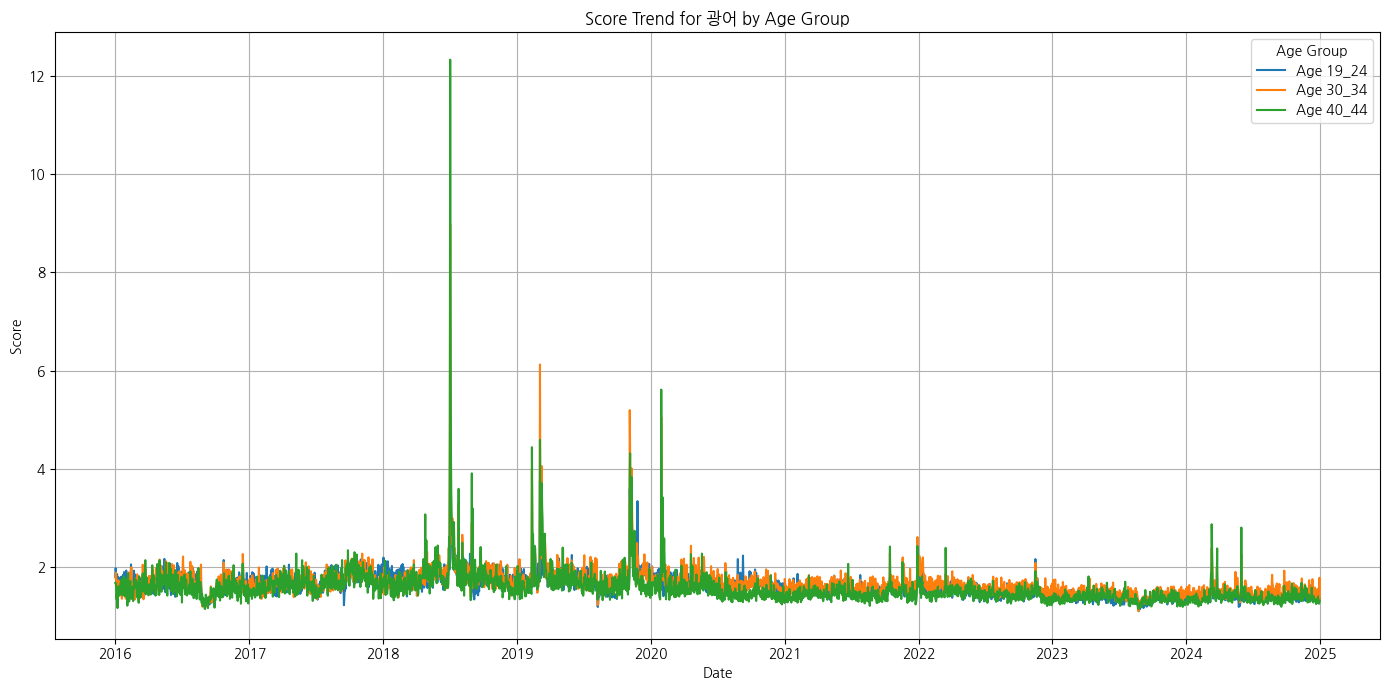

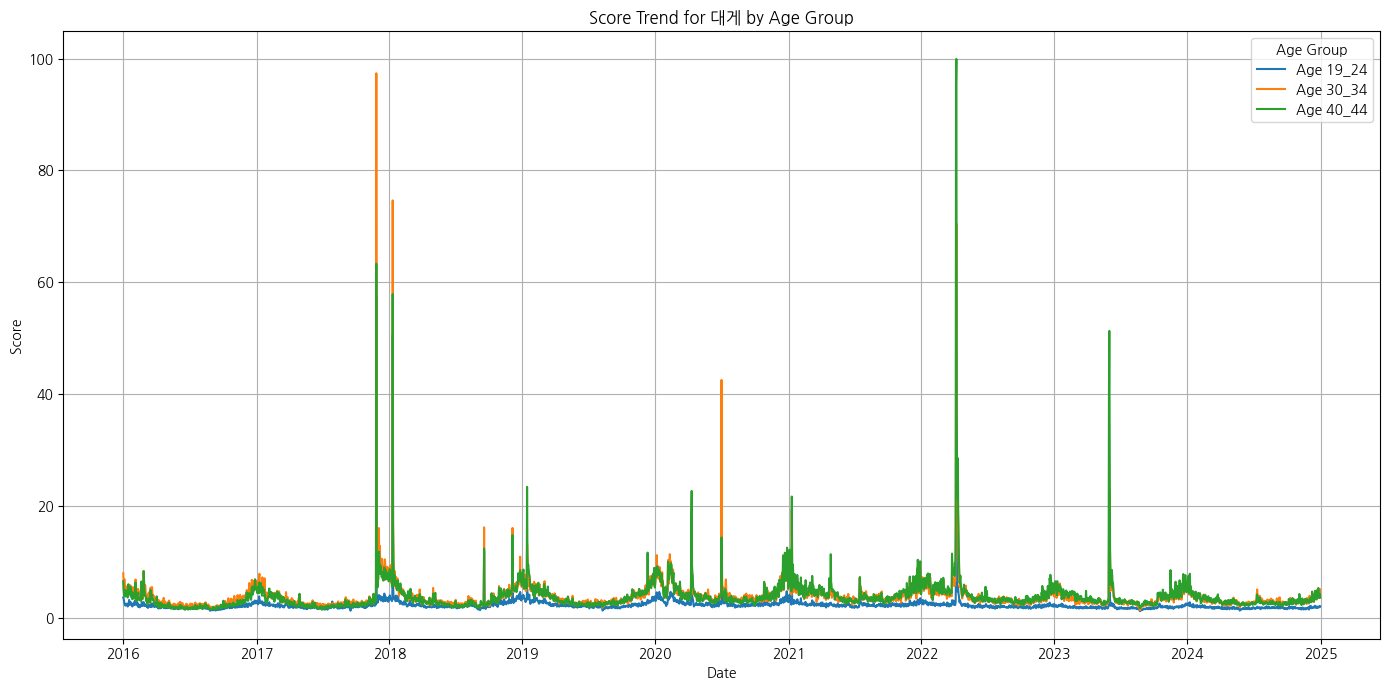

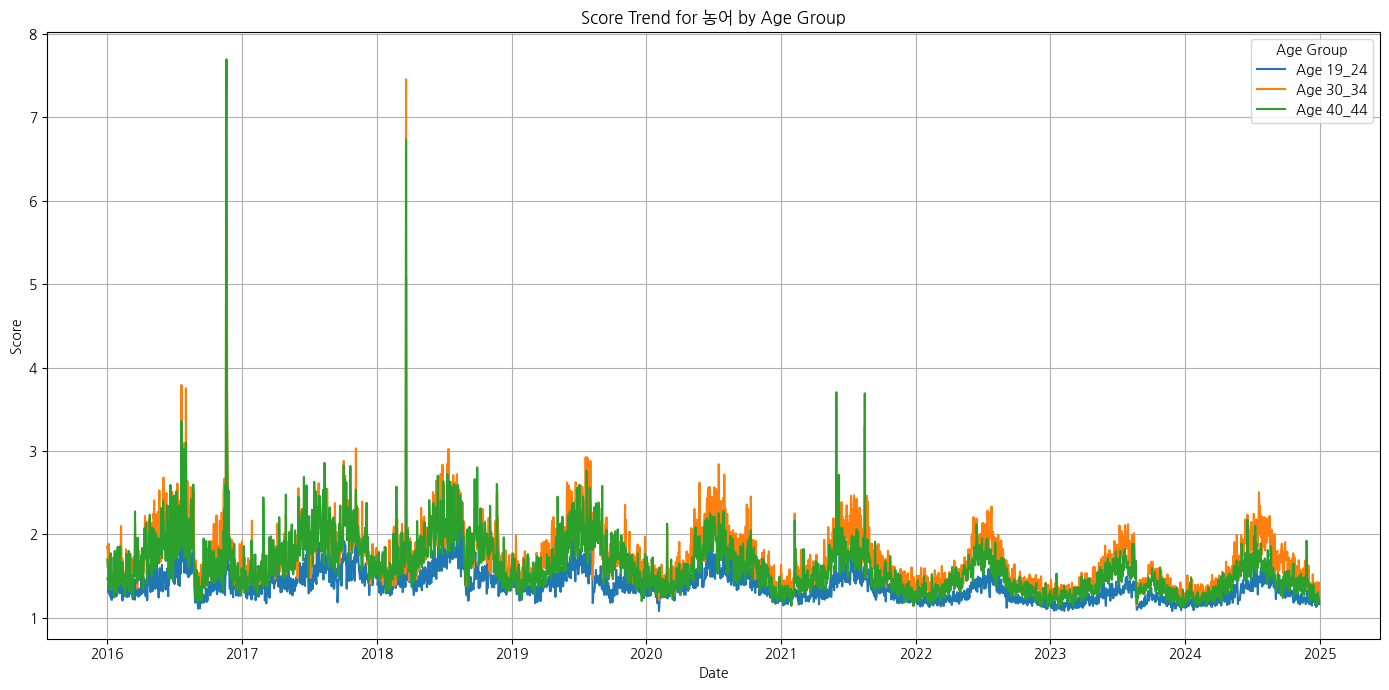

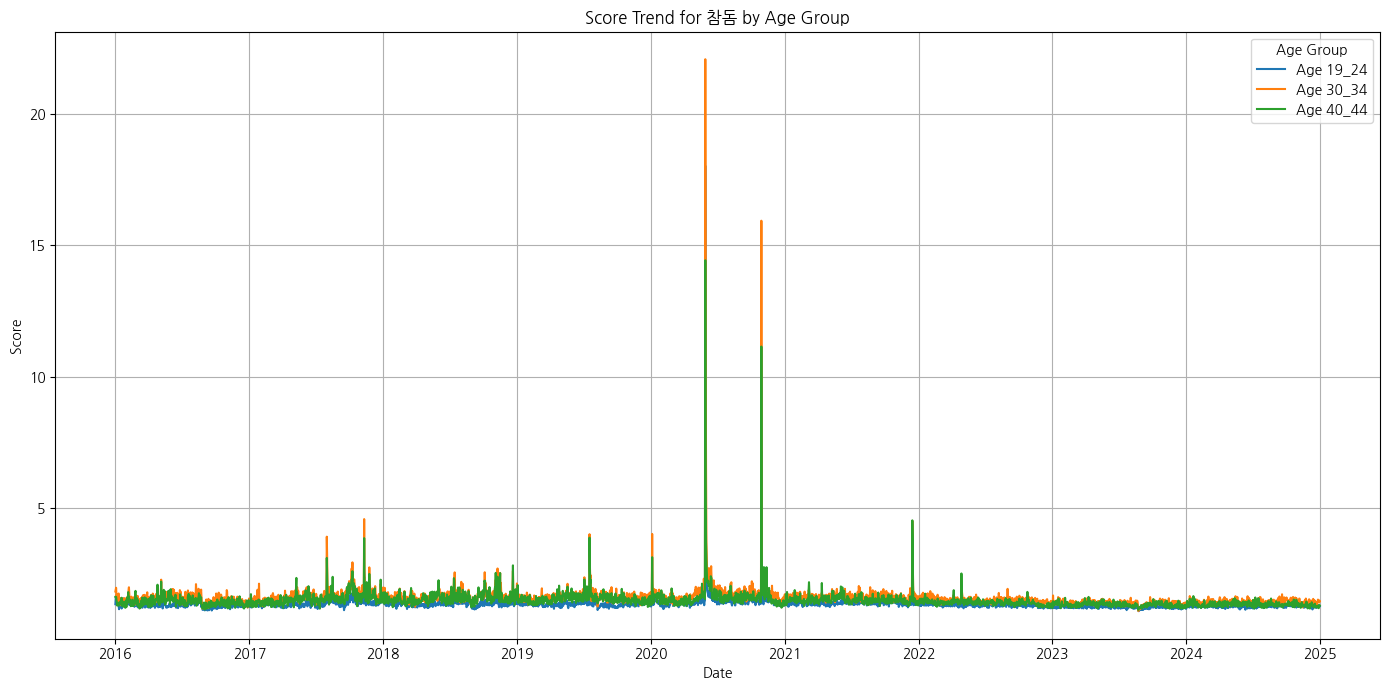

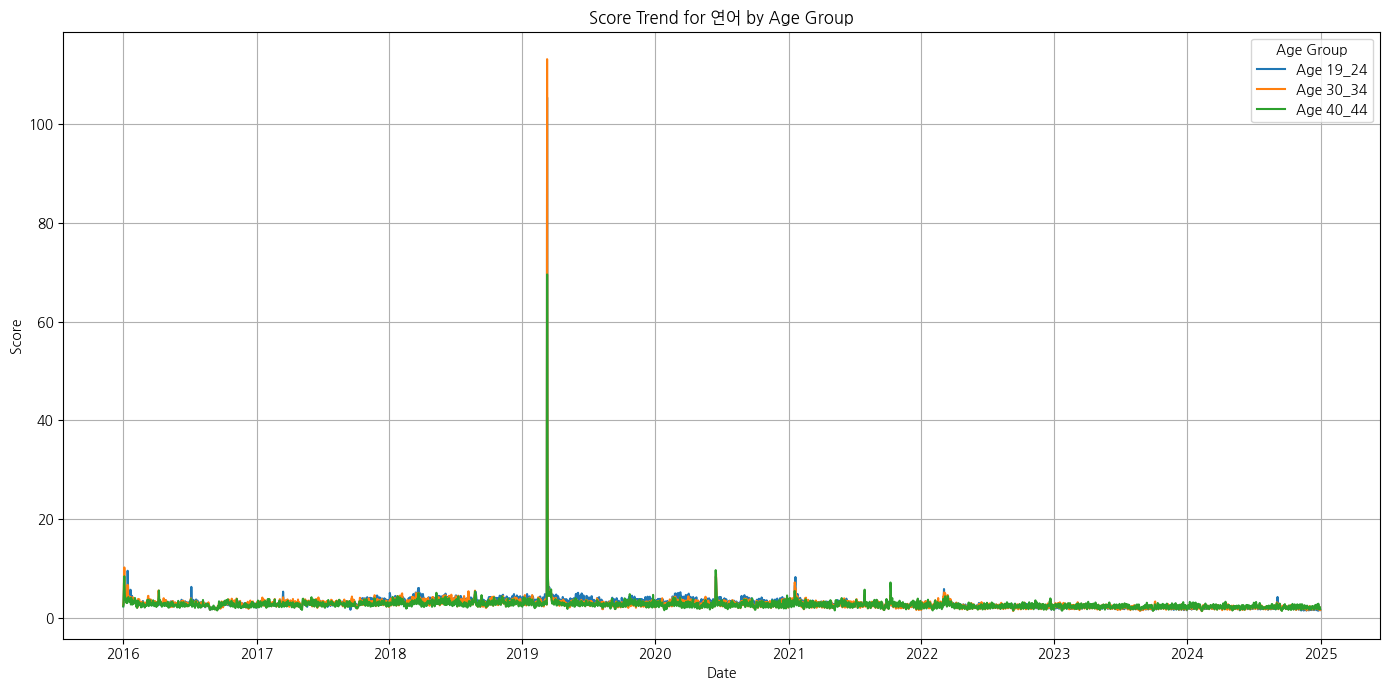

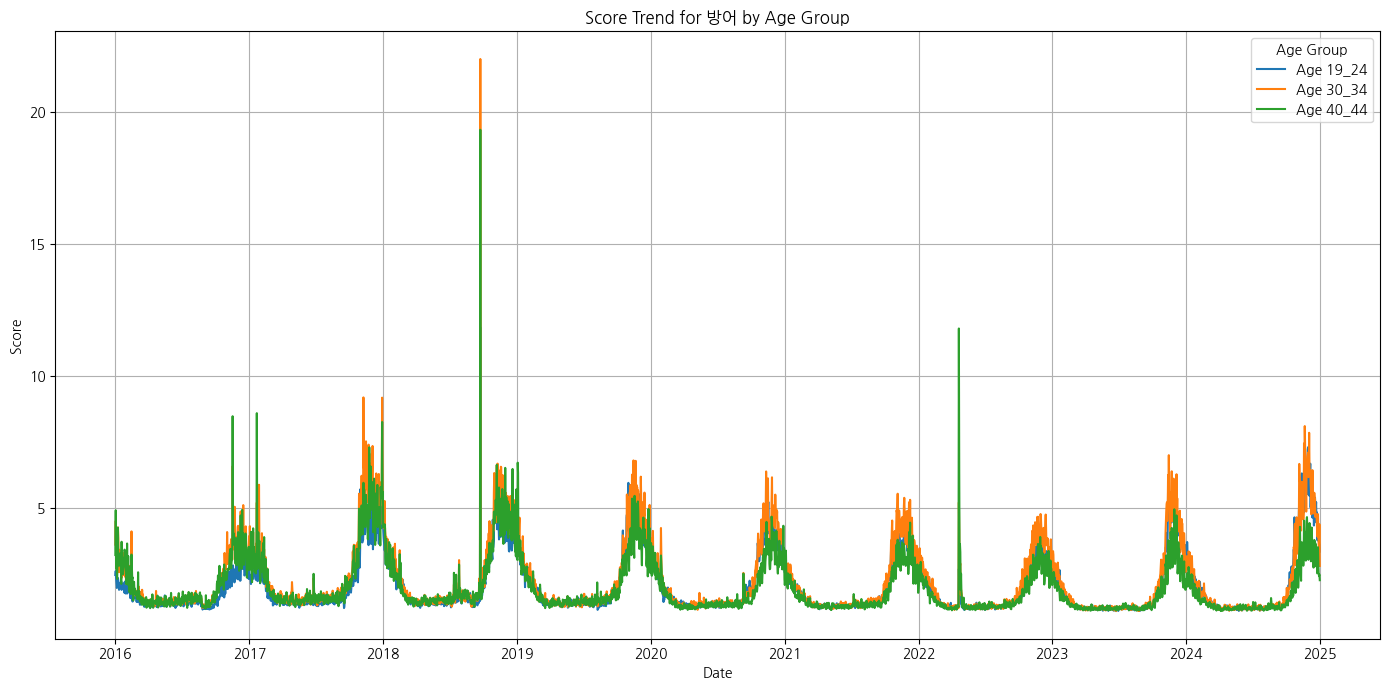

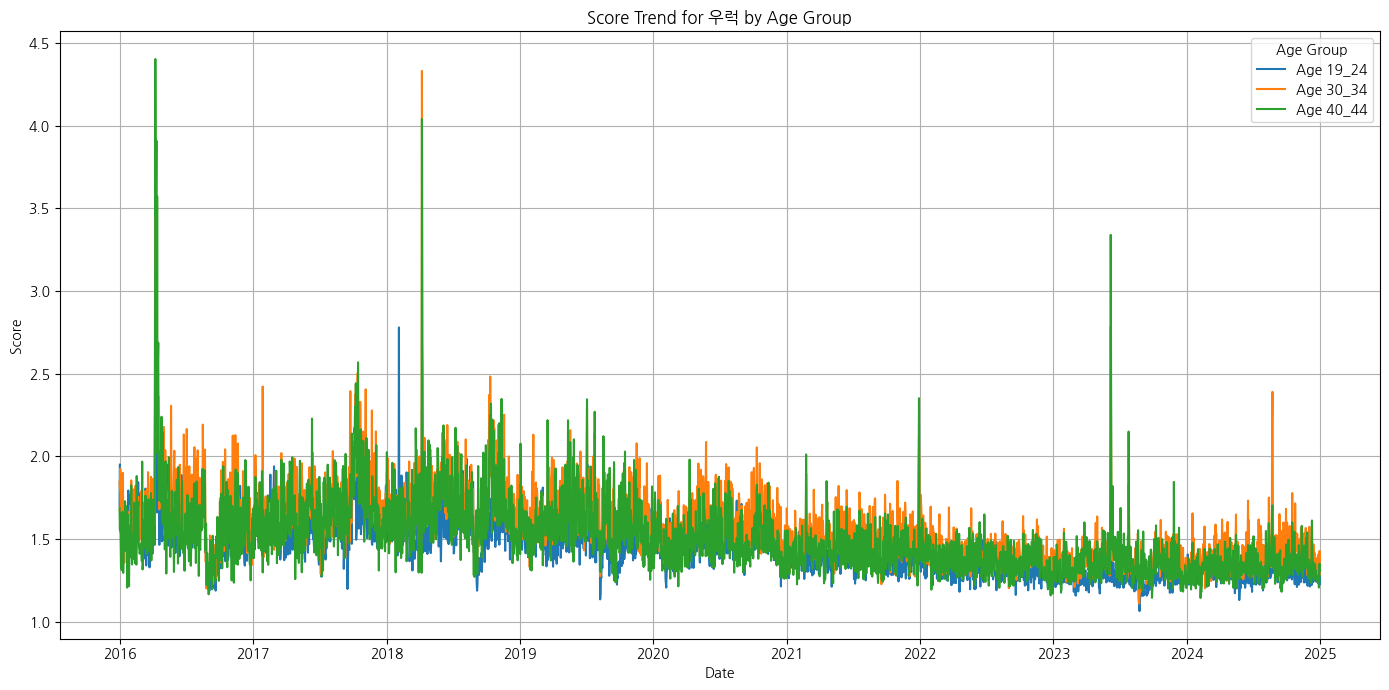

In [4]:
# 라인차트 시각화
item_list = '광어, 대게, 농어, 참돔, 연어, 방어, 우럭'.split(", ")

for name in item_list:
    df_trend_data = pd.read_csv(f"../data/raw/nst_{name}_trend_2025-01-17.csv")
    df_trend_data["date"] = pd.to_datetime(df_trend_data["date"])
    df_trend_data = df_trend_data[df_trend_data["age"].isin(
        ['19_24', '30_34', '40_44']
    )]
    plt.figure(figsize=(14, 7))
    
    # 특정 품목 데이터 필터링
    subset = df_trend_data[df_trend_data['name'] == name]
    
    # age 별로 시각화
    for age_group in subset['age'].unique():
        age_subset = subset[subset['age'] == age_group]
        plt.plot(
            age_subset['date'],
            age_subset['score'],
            label=f'Age {age_group}'
        )
    
    # 그래프 꾸미기
    plt.title(f'Score Trend for {name} by Age Group')
    plt.xlabel('Date')
    plt.ylabel('Score')
    plt.legend(title='Age Group')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


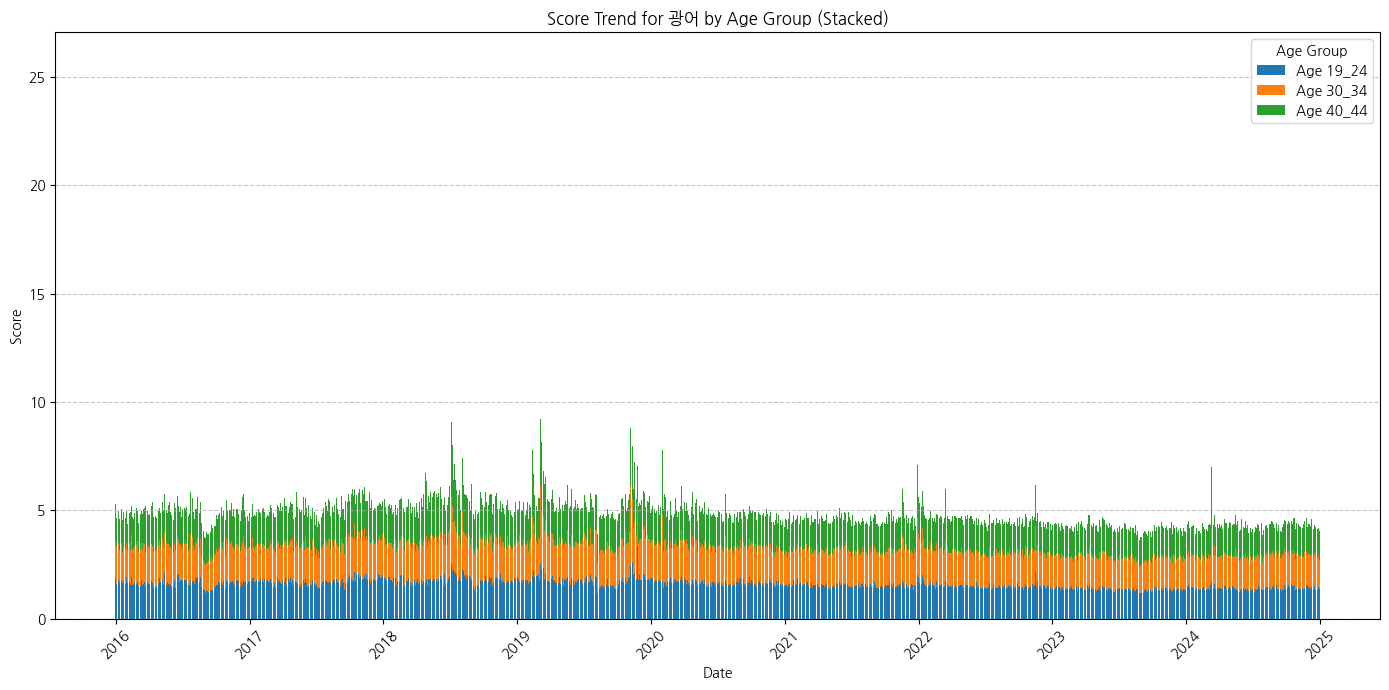

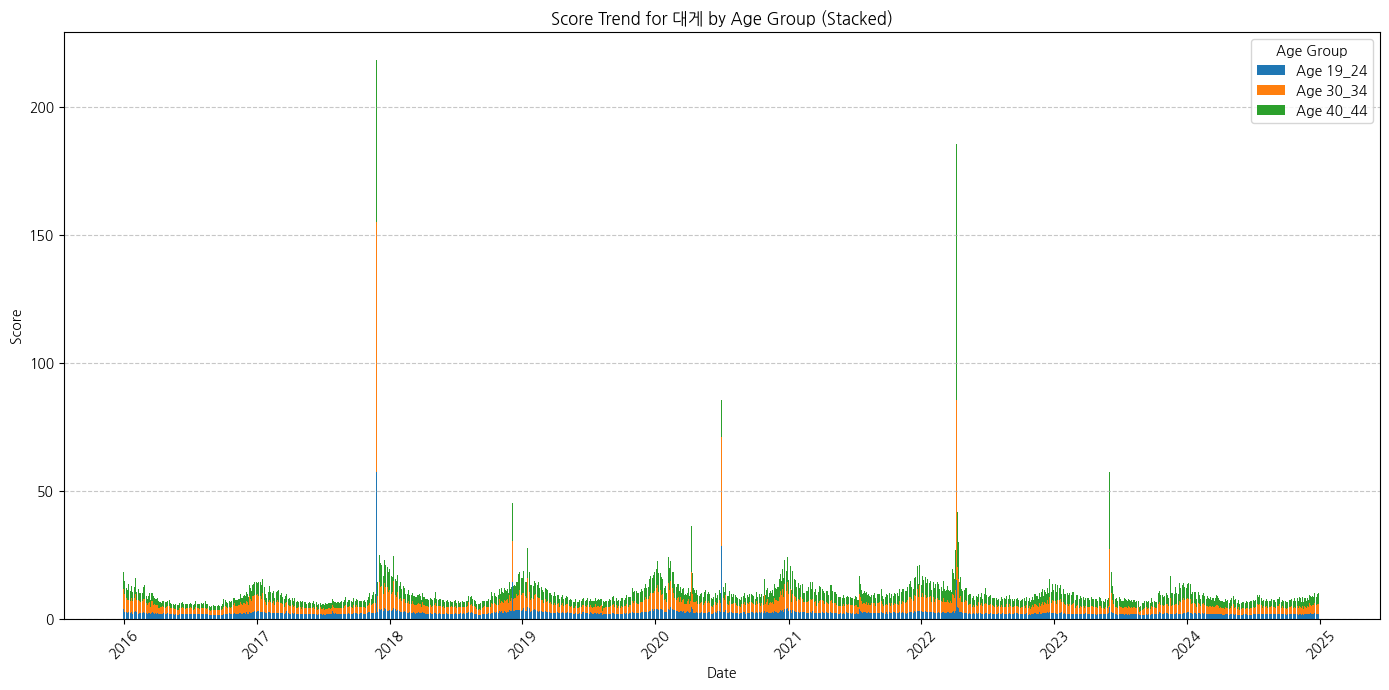

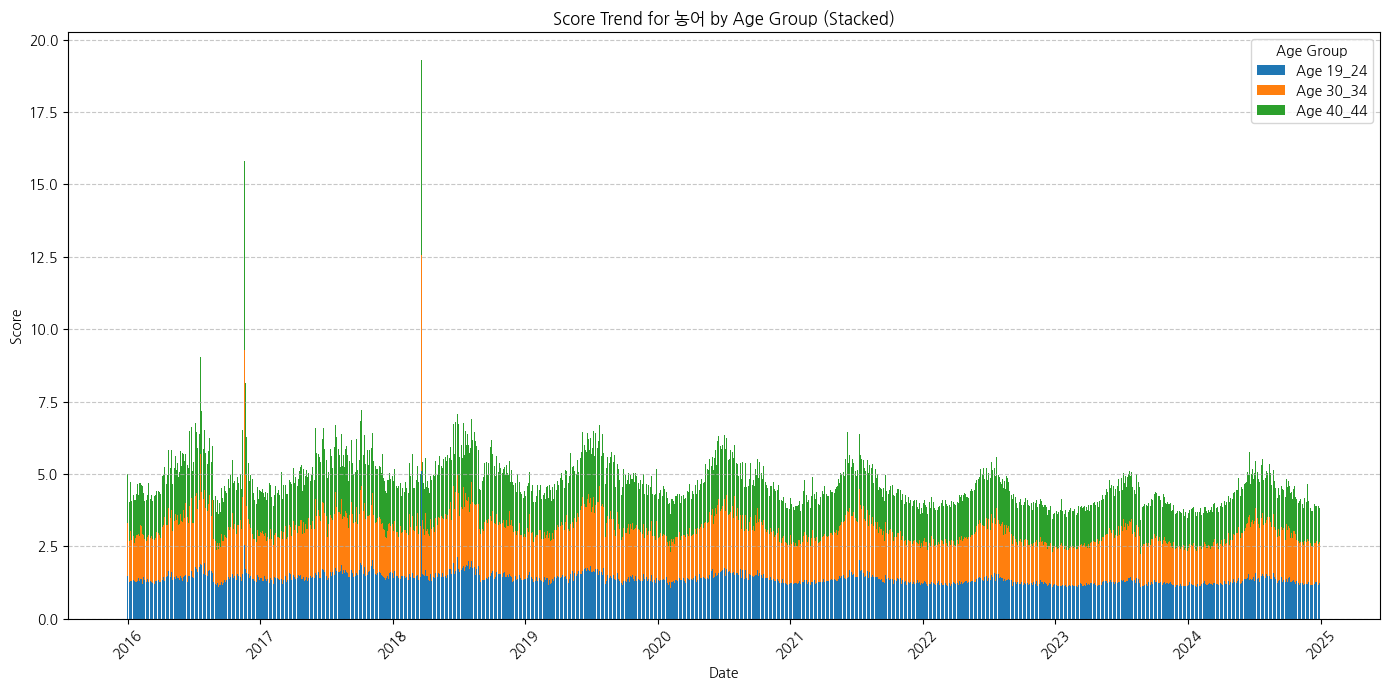

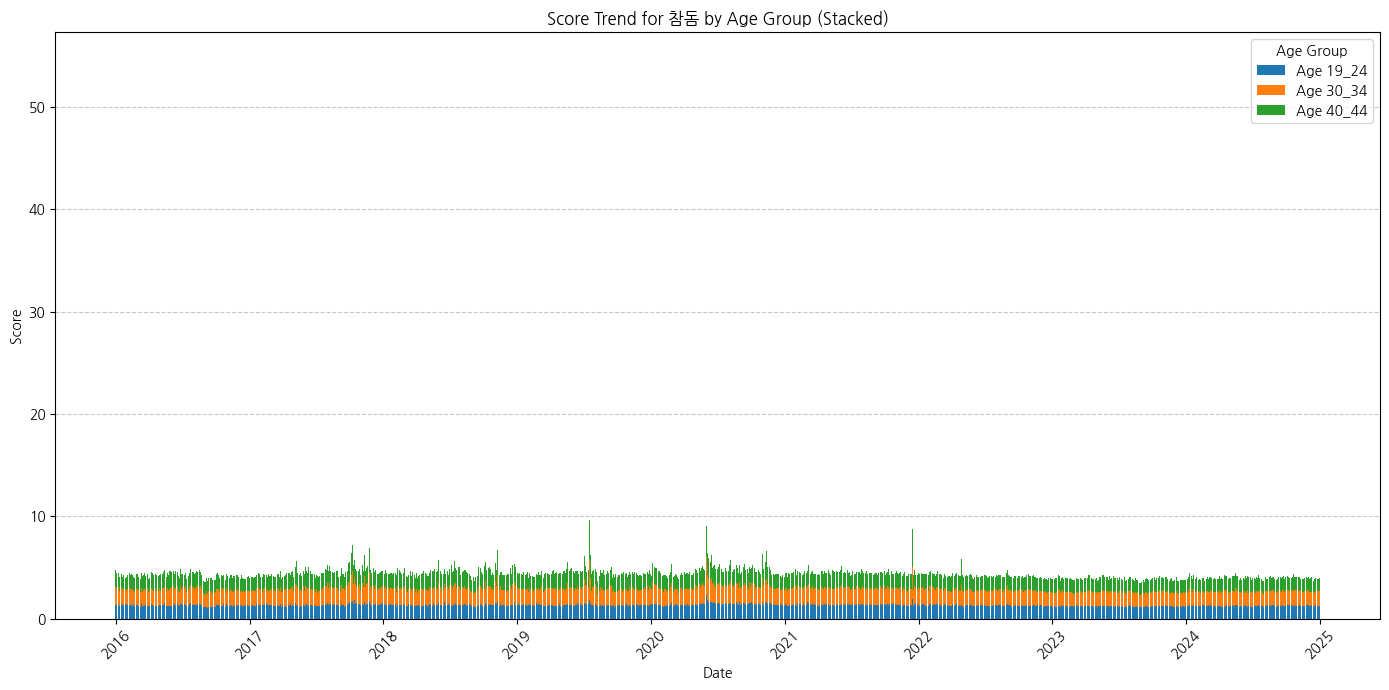

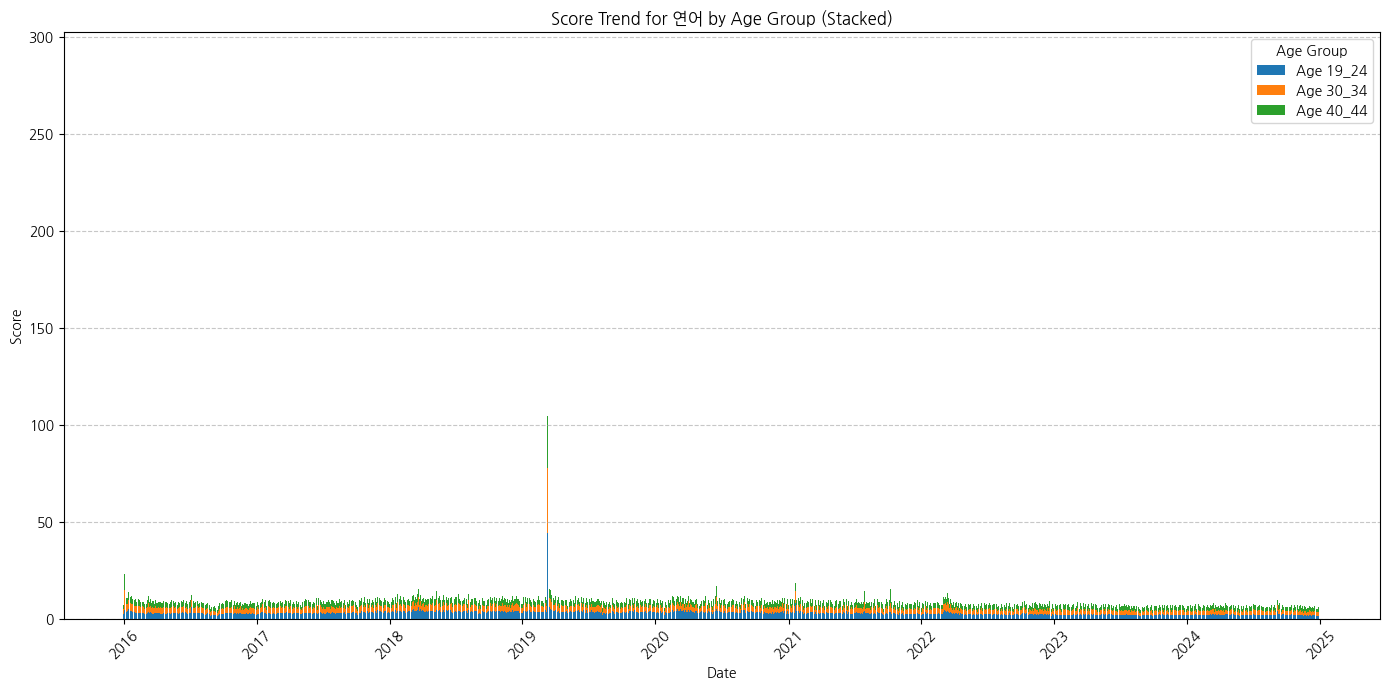

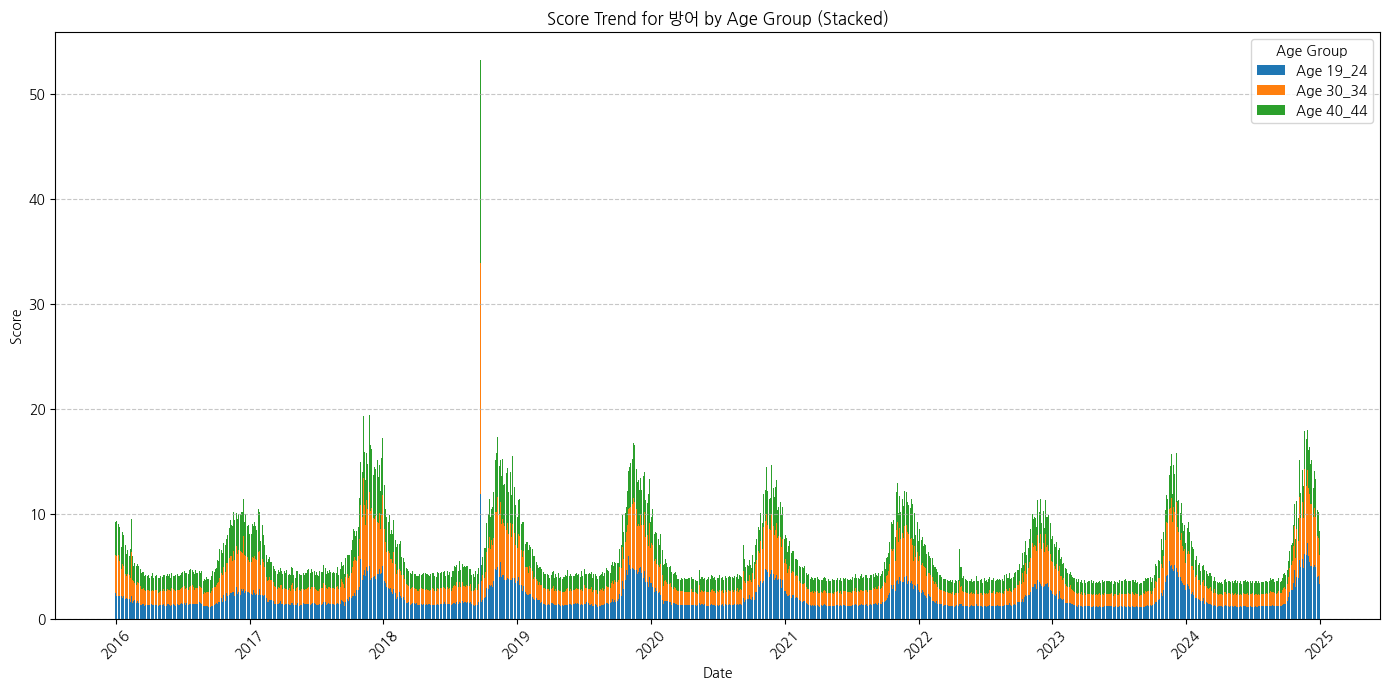

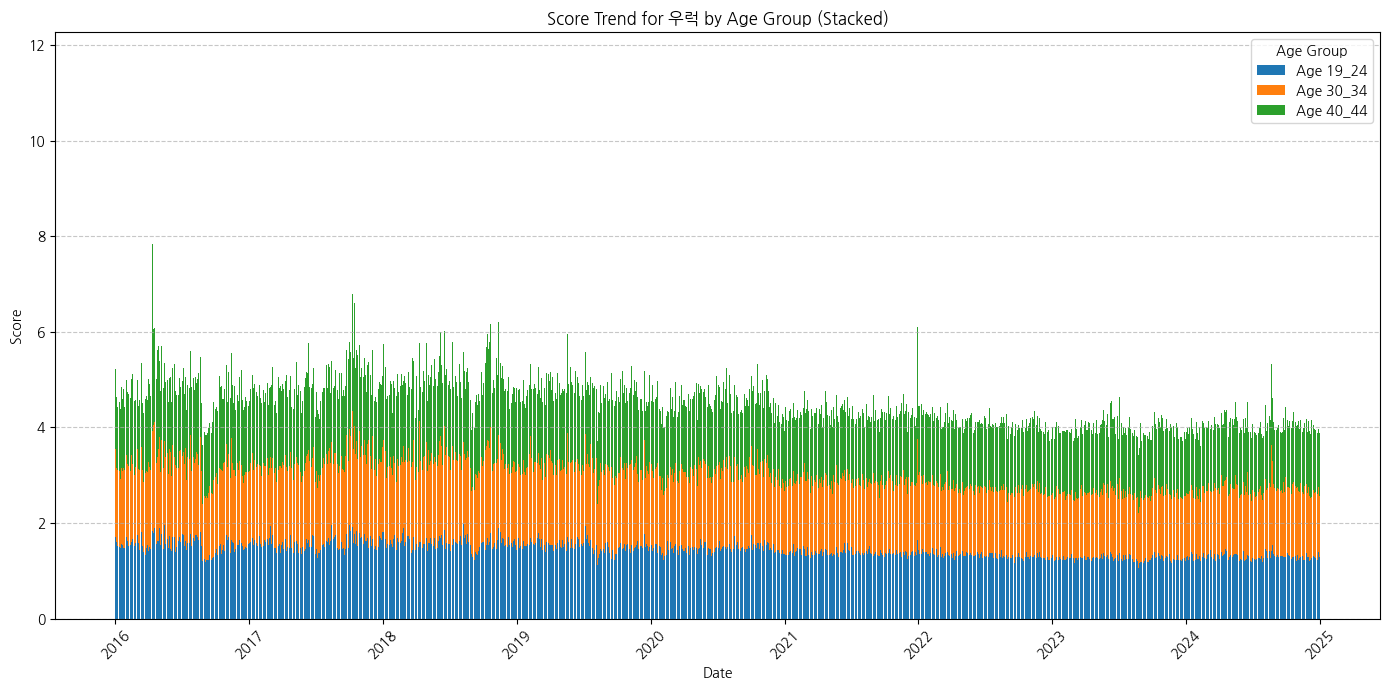

In [5]:

item_list = '광어, 대게, 농어, 참돔, 연어, 방어, 우럭'.split(", ")

for name in item_list:
    # 데이터 불러오기
    df_trend_data = pd.read_csv(f"../data/raw/nst_{name}_trend_2025-01-17.csv")
    df_trend_data["date"] = pd.to_datetime(df_trend_data["date"])
    
    # 특정 age 그룹 필터링
    df_trend_data = df_trend_data[df_trend_data["age"].isin(['19_24', '30_34', '40_44'])]
    
    # 피벗 테이블 생성 (날짜별 나이 그룹의 점수를 열로 분리)
    pivot_data = df_trend_data.pivot(index="date", columns="age", values="score")
    
    # 그래프 설정
    plt.figure(figsize=(14, 7))
    
    # 스택형 막대그래프 그리기
    bottom = None
    for age_group in pivot_data.columns:
        plt.bar(
            pivot_data.index,               # x축에 날짜
            pivot_data[age_group],          # 막대 높이
            bottom=bottom,                  # 이전 나이 그룹의 값을 기준으로 누적
            label=f'Age {age_group}'        # 범례
        )
        # bottom 값을 업데이트
        bottom = pivot_data[age_group] if bottom is None else bottom + pivot_data[age_group]
    
    # 그래프 꾸미기
    plt.title(f'Score Trend for {name} by Age Group (Stacked)')
    plt.xlabel('Date')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend(title='Age Group')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
